# Introdução

A primeira base de dados a ser explorada neste trabalho é a base de dados disponibilizada pelo **INEP** disponibilizada no link : https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip. A base de dados contendo os dados dos alunos participantes do **ENEM** contem inúmeras colunas, desde informações básicas como código do município, cor da prova, respostas das questões, respostas do questionário socioeconômico do aluno, dentre outras. O principal objetivo em utilizar esta base de dados está na classificação dos alunos em **Aprovado** para aqueles que obtiveram média superior a 700 e **Nao-Aprovado** para os que obtiveram média inferior, a partir de informações básicas dos mesmos. Para cumprir tal objetivo boa parte das colunas não são necessárias para a classificação. As colunas que seram mantidas são: 
* CO_MUNICIPIO_RESIDENCIA: Código da residência do aluno;
* NU_IDADE: Idade do aluno;
* TP_ESTADO_CIVIL: Estado civil do aluno;
* TP_COR_RACA: Cor do aluno;
* TP_NACIONALIDADE: Nacionalidade do aluno;
* CO_MUNICIPIO_NASCIMENTO: Código do município de nascimento;
* TP_ST_CONCLUSAO: Situação de conclusão do ENsino Médio, por exemplo, se concluiu, ou não, se está cursando ainda...
* TP_ANO_CONCLUIU: Ano de conclusão do Ensino Médio;
* TP_ESCOLA: Tipo de escola do Ensino Médio, por exemplo, se é pública, privada...
* TP_ENSINO: Tipo de escola que concluiu ou concluirá o Ensino Médio, por exemplo, se é ensino regular, EJA(Educação de jovens e adultos);
* IN_TREINEIRO: Indica se o participante está fazendo a prova por exeperiência ou não;
* CO_ESCOLA: Código da escola do aluno.


# Descrição dos experimentos

Para fazer a classificação dos alunos em **Aprovado** e **Nao-Aprovado**, primeiro devemos fazer uma etapa de **Pré-Processamento**, pois na base de dados original só contem apenas os dados das notas e não uma classificação. Para isso criarei uma lista que irá representar a média que cada aluno obteve no **ENEM**, a média será calculada como o somatório das colunas contendo a nota de cada área da prova de cada aluno:

* NU_NOTA_CN	
* NU_NOTA_CH	
* NU_NOTA_LC	
* NU_NOTA_MT	
* NU_NOTA_REDACAO

divido por 5, para fazer a classificação de cada aluno, criarei uma coluna chamada **Aprovacao**, na qual vou percorrer a lista das médias e vou atribuir "1" para o participante que teve média superior a **7.0** e "0" para quem teve média inferior a **7.0**. Por fim a coluna **Aprovacao** será adicionada á base customizada, ela representará o "Y" do nosso problema de classificação, ou seja, será a classe que cada aluno pertence.


## Algoritmos utilizados

O algoritmo que será utilizado para realizar a classificação, será o MLP(Multi Layer Perceptron), apresentaremos duas configurações diferentes de uma MLP utilizando a API do Keras e uma configuração semelhante á ensinada em sala de aula, utlizando a biblioteca Scikit-learn. Todos os algoritmos utilizados neste trabalho foram testados utilizando Cross Validation com k = 10.

1. Primeira MLP: Possui configuração igual a repassada em sala de aula, utilizando o algoritmo MLPClassifier da biblioteca Scikit-learn.
    - Uma Camada totalmente conectada com 11 neurônios de entrada conectados a;
    - Uma Camada totalmente conectada com 100 neurônios conectados a;
    - Uma Camada totalmente conectada com 1 neurônio de saída, responsável pela classificação.
            
         - Parâmetros:
             - verbose = True;
             - max_iter = 5; 
             - tol = 0.0000010;
             - solver= 'adam';
             - hidden_layer_sizes=(11, 100,);
             - activation='relu'.
1. Segunda MLP: Possui configuração igual a Primeira MLP, no entanto, utilizando a API do Keras.
    - Uma Camada totalmente conectada com 11 neurônios de entrada conectados a;
    - Uma Camada totalmente conectada com 100 neurônios conectados a;
    - Uma Camada de ativação "Relu";
    - Uma Camada de Dropout; 
    - Uma Camada totalmente conectada com 1 neurônio de saída;
    - Uma Camada de ativação "sigmoid".
            
         - Parâmetros:
             - Dense(100)
             - Dropout(0.15);
             - EarlyStopping: Para verificar enquanto o erro não baixar de 0.0000010, semelhante ao parâmetro "tol", da Primeira MLP; 
             - metrics='accuracy';
             - optimizer='adam'.
             
1. Terceira MLP: Visando analisar se o número de camadas necessariamente significa melhor performace da rede, decidimos adicionar mais camadas totalmente conectadas, para analisarmos se há melhora na acurácia do modelo, a rede é desenvolvida uitlizando a API do Keras.
    - Uma Camada totalmente conectada com 11 neurônios de entrada conectados a;
    - Uma Camada totalmente conectada com 128 neurônios conectados a;
    - Uma Camada de ativação "Relu";
    - Uma Camada de Dropout; 
    - Uma Camada totalmente conectada com 128 neurônios conectados a;
    - Uma Camada de ativação "Relu";
    - Uma Camada de Dropout; 
    - Uma Camada totalmente conectada com 1 neurônio de saída;
    - Uma Camada de ativação "sigmoid".
            
         - Parâmetros:
             - Dense(128);
             - Dropout(0.15);
             - EarlyStopping: Para verificar enquanto o erro não baixar de 0.0000010, semelhante ao parâmetro "tol", da Primeira MLP; 
             - metrics='accuracy';
             - optimizer='adam'.            

## Etapa de Pré-Processamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


In [2]:
data_original = pd.read_csv('base.csv', sep=',')

In [3]:
data_original.head(6)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A
5,6,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,2016,2902005,Aracatu,29,BA,18,F,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
#Removendo as colunas do questionário socio econômico
linhas = []

for i in range(1,51):
    if(i < 10): linhas.append('Q00'+str(i))
    else: linhas.append('Q0'+str(i))

data_original = data_original.drop(linhas,axis=1)

In [5]:
data_original.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,140.0,120.0,120.0,120.0,80.0,580.0
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_original.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,10133.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,516.472841,482.497928,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,68.688190,99.826323,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,468.100000,408.900000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,520.900000,461.200000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,564.900000,537.600000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,763.600000,952.000000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


In [7]:
#Verificando valores NaN
data_original = data_original.fillna(data_original.mean(0))
data_original.isnull().sum()

Unnamed: 0                    0
NU_INSCRICAO                  0
NU_ANO                        0
CO_MUNICIPIO_RESIDENCIA       0
NO_MUNICIPIO_RESIDENCIA       0
CO_UF_RESIDENCIA              0
SG_UF_RESIDENCIA              0
NU_IDADE                      0
TP_SEXO                       0
TP_ESTADO_CIVIL               0
TP_COR_RACA                   0
TP_NACIONALIDADE              0
CO_MUNICIPIO_NASCIMENTO       0
NO_MUNICIPIO_NASCIMENTO     609
CO_UF_NASCIMENTO              0
SG_UF_NASCIMENTO            609
TP_ST_CONCLUSAO               0
TP_ANO_CONCLUIU               0
TP_ESCOLA                     0
TP_ENSINO                     0
IN_TREINEIRO                  0
CO_ESCOLA                     0
CO_MUNICIPIO_ESC              0
NO_MUNICIPIO_ESC           9448
CO_UF_ESC                     0
SG_UF_ESC                  9448
TP_DEPENDENCIA_ADM_ESC        0
TP_LOCALIZACAO_ESC            0
TP_SIT_FUNC_ESC               0
IN_BAIXA_VISAO                0
                           ... 
CO_UF_PR

In [8]:
#Separando as colunas com as notas
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
media = []
notas_prova = data_original[provas]
notas_prova.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,436.300000,495.400000,581.200000,399.400000,520.000000
1,474.500000,544.100000,599.000000,459.800000,580.000000
2,473.495155,529.661087,516.472841,482.497928,529.048258
3,473.495155,529.661087,516.472841,482.497928,529.048258
4,473.495155,529.661087,516.472841,482.497928,529.048258


In [9]:
#Fazendo a média e depois criando a coluna aprovacao
for i in range(0, len(data_original['NU_NOTA_CN'])):
    j = notas_prova.iloc[i].values.sum()
    media.append(j/5)
    
aprovados = []

for i in range(0, len(data_original['NU_NOTA_CN'])):
    if(media[i] > 700):
        aprovados.append(1)
    else:
        aprovados.append(0)
    
    
    
data_original['Aprovacao'] = aprovados

data_original.head(6)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Aprovacao
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.000000,120.000000,120.000000,120.000000,80.000000,80.000000,520.000000,0
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.000000,140.000000,120.000000,120.000000,120.000000,80.000000,580.000000,0
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,NaN,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,NaN,NaN,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,NaN,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0
5,6,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,2016,2902005,Aracatu,29,BA,18,F,0.0,...,EDECACCBBEDEBBBDABCBBCCEBADCEBAAEAAEDCBCABDBAB...,CEECDBDADEBCCEBABECEACBDABDBDDABDDECADCCEACBA,1.000000,120.000000,120.000000,120.000000,160.000000,100.000000,620.000000,0


In [10]:
# Nova base de dados sem as colunas desnecessárias, e com a nova coluna aprovacoes  

previsores = ['CO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'Aprovacao']

new_data = data_original[previsores]

new_data.head(6)

,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,Aprovacao
0,4314902,24,0.0,1,1,4314902.0,1,4,1,1.178888,0,3.121720e+07,0
1,2304707,17,0.0,3,1,2304707.0,2,0,2,1.000000,0,2.300516e+07,0
2,2304400,21,0.0,3,1,2304400.0,3,0,1,1.178888,0,3.121720e+07,0
3,3304557,25,0.0,0,1,3304557.0,1,9,1,1.178888,0,3.121720e+07,0
4,1302603,28,0.0,2,1,1505304.0,1,4,1,1.178888,0,3.121720e+07,0
5,2902005,18,0.0,1,1,2933307.0,1,1,1,1.178888,0,3.121720e+07,0


In [11]:
#Tratar valores NaN
new_data.isnull().sum()

CO_MUNICIPIO_RESIDENCIA    0
NU_IDADE                   0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_NACIONALIDADE           0
CO_MUNICIPIO_NASCIMENTO    0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
TP_ENSINO                  0
IN_TREINEIRO               0
CO_ESCOLA                  0
Aprovacao                  0
dtype: int64

In [12]:
# Verificando a quantidade de pessoas acima da média
print(len(new_data[new_data['Aprovacao'] == 1]))

142


In [13]:
# Separando as características das classes
x = new_data.iloc[:, 1:12].values
y = new_data.iloc[:, 12].values

In [14]:
#normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

# 1º MLP

In [15]:
model1 = MLPClassifier(verbose = True, max_iter = 5, tol = 0.0000010, solver= 'adam', hidden_layer_sizes=(11, 100,), activation='relu')

In [18]:
acuracias1 = []
cv = KFold(n_splits=10, shuffle=True)
for train_index, test_index in cv.split(x):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    model1.fit(x_train, y_train)
    acc = model1.score(x_test, y_test)
    acuracias1.append(acc)
    if(acc >= max(acuracias1)): 
        melhor_x_text = x_test #Pegando o conjunto de teste que teve a melhor acurácia
        melhor_y_text = y_test

Iteration 1, loss = 0.33625550
Iteration 2, loss = 0.07373786
Iteration 3, loss = 0.06049386
Iteration 4, loss = 0.05739993
Iteration 5, loss = 0.05475517


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.39836143
Iteration 2, loss = 0.07333042
Iteration 3, loss = 0.05490984
Iteration 4, loss = 0.05429770
Iteration 5, loss = 0.05407965
Iteration 1, loss = 0.30024761


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.07279646
Iteration 3, loss = 0.06130178
Iteration 4, loss = 0.05973853
Iteration 5, loss = 0.05840404


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.33236993
Iteration 2, loss = 0.07379243
Iteration 3, loss = 0.05891744
Iteration 4, loss = 0.05705772
Iteration 5, loss = 0.05612506


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.43599950
Iteration 2, loss = 0.08092305
Iteration 3, loss = 0.05950827
Iteration 4, loss = 0.05878417
Iteration 5, loss = 0.05827696
Iteration 1, loss = 0.68047666


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.13823651
Iteration 3, loss = 0.05753969
Iteration 4, loss = 0.05459760
Iteration 5, loss = 0.05396160


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.45999478
Iteration 2, loss = 0.07654867
Iteration 3, loss = 0.05862367
Iteration 4, loss = 0.05757030
Iteration 5, loss = 0.05671980
Iteration 1, loss = 0.28511140


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.06633591
Iteration 3, loss = 0.05798223
Iteration 4, loss = 0.05638196
Iteration 5, loss = 0.05530571


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.29723491
Iteration 2, loss = 0.06067982
Iteration 3, loss = 0.05517093
Iteration 4, loss = 0.05475080
Iteration 5, loss = 0.05431056
Iteration 1, loss = 0.30296620


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.06678590
Iteration 3, loss = 0.05900103
Iteration 4, loss = 0.05839765
Iteration 5, loss = 0.05785336


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
accuracy1 = np.mean(acuracias1)
desvioPadrao1 = np.sqrt(np.var(accuracy1))
print('Acurácias encontradas no K-Fold 10: ', acuracias1)
print()
print('Acurácia Média 1:',accuracy1)
print('Desvio Padrão 1:', desvioPadrao1)
print('Variância 1:', np.var(accuracy1))

Acurácias encontradas no K-Fold 10:  [0.9883466860888566, 0.9861616897305171, 0.9927166788055353, 0.9927166788055353, 0.9927166788055353, 0.9861616897305171, 0.98761835396941, 0.989075018208303, 0.98761835396941, 0.9934450109249818]

Acurácia Média 1: 0.98965768390386
Desvio Padrão 1: 0.0
Variância 1: 0.0


In [25]:
y_pred_model1 = model1.predict(melhor_x_text).ravel()
fpr_model1, tpr_model1, thresholds_model1 = roc_curve(melhor_y_text, y_pred_model1)
auc_model1 = auc(fpr_model1, tpr_model1)

# 2º MLP

In [26]:
model2 = Sequential()

model2.add(Dense(100, input_dim=11))
model2.add(Activation('relu'))
model2.add(Dropout(0.15))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
earlystop = EarlyStopping(monitor = 'val_loss', # Vai monitorar o val_loss
                          min_delta = 0.0000010) # Mudança mínima, ou seja, se tiver uma mudança menor que zero já pode parar

In [29]:
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [40]:
acuracias2 = []
cv = KFold(n_splits=10, shuffle=True)
for train_index, test_index in cv.split(x):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    model2.fit(x_train, y_train, epochs=5)
    score, acc = model2.evaluate(x_test, y_test)
    acuracias2.append(acc)
    if(acc >= max(acuracias2)): 
        melhor_x_text_model2 = x_test #Pegando o conjunto de teste que teve a melhor acurácia
        melhor_y_text_model2 = y_test

Epoch 1/5
12357/12357 [==============================] - 2s 202us/step - loss: 0.0467 - acc: 0.9898
Epoch 2/5
12357/12357 [==============================] - 2s 145us/step - loss: 0.0462 - acc: 0.9898
Epoch 3/5
12357/12357 [==============================] - 2s 128us/step - loss: 0.0461 - acc: 0.9898
Epoch 4/5
12357/12357 [==============================] - 2s 128us/step - loss: 0.0462 - acc: 0.9898
Epoch 5/5
1373/1373 [==============================] - 0s 62us/step 
Epoch 1/5
12357/12357 [==============================] - 1s 94us/step - loss: 0.0471 - acc: 0.9894
Epoch 2/5
12357/12357 [==============================] - 1s 96us/step - loss: 0.0471 - acc: 0.9894
Epoch 3/5
12357/12357 [==============================] - 1s 94us/step - loss: 0.0469 - acc: 0.9894
Epoch 4/5
12357/12357 [==============================] - 1s 91us/step - loss: 0.0473 - acc: 0.9894
Epoch 5/5
1373/1373 [==============================] - 0s 38us/step
Epoch 1/5
12357/12357 [==============================] - 1s 75us/st

In [41]:
accuracy2 = np.mean(acuracias2)
desvioPadrao2 = np.sqrt(np.var(accuracy2))
print('Acurácias encontradas no K-Fold: ', acuracias2)
print()
print('Acurácia Média:',accuracy2)
print('Desvio Padrão:', desvioPadrao2)
print('Variância:', np.var(accuracy2))

Acurácias encontradas no K-Fold:  [0.9883466856981488, 0.9919883466860888, 0.9912600145666424, 0.9883466860888566, 0.9919883466860888, 0.9905316824471959, 0.989075018208303, 0.9854333572203628, 0.991988346295381, 0.9876183544469418]

Acurácia Média: 0.9896576838344011
Desvio Padrão: 0.0
Variância: 0.0


In [42]:
y_pred_model2 = model2.predict(melhor_x_text_model2).ravel()
fpr_model2, tpr_model2, thresholds_model2 = roc_curve(melhor_y_text_model2, y_pred_model2)
auc_model2 = auc(fpr_model2, tpr_model2)

# 3º MLP

In [34]:
model3 = Sequential()

model3.add(Dense(128, input_dim=11))
model3.add(Activation('relu'))
model3.add(Dropout(0.15))
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.15))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

In [35]:
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [43]:
acuracias3 = []
cv = KFold(n_splits=10, shuffle=True)
for train_index, test_index in cv.split(x):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    model3.fit(x_train, y_train, epochs=5)
    score, acc = model3.evaluate(x_test, y_test)
    acuracias3.append(acc)
    if(acc >= max(acuracias3)): 
        melhor_x_text_model3 = x_test #Pegando o conjunto de teste que teve a melhor acurácia
        melhor_y_text_model3 = y_test

Epoch 1/5
12357/12357 [==============================] - 3s 255us/step - loss: 0.0461 - acc: 0.9896
Epoch 2/5
12357/12357 [==============================] - 2s 137us/step - loss: 0.0455 - acc: 0.9896
Epoch 3/5
12357/12357 [==============================] - 1s 103us/step - loss: 0.0464 - acc: 0.9896
Epoch 4/5
12357/12357 [==============================] - 1s 88us/step - loss: 0.0461 - acc: 0.9896
Epoch 5/5
1373/1373 [==============================] - 0s 31us/step
Epoch 1/5
12357/12357 [==============================] - 1s 88us/step - loss: 0.0455 - acc: 0.9897
Epoch 2/5
12357/12357 [==============================] - 1s 88us/step - loss: 0.0462 - acc: 0.9897
Epoch 3/5
12357/12357 [==============================] - 1s 89us/step - loss: 0.0453 - acc: 0.9897
Epoch 4/5
12357/12357 [==============================] - 1s 88us/step - loss: 0.0456 - acc: 0.9897
Epoch 5/5
1373/1373 [==============================] - 0s 28us/step
Epoch 1/5
12357/12357 [==============================] - 1s 89us/step

In [44]:
accuracy3 = np.mean(acuracias3)
desvioPadrao3 = np.sqrt(np.var(accuracy3))
print('Acurácias encontradas no K-Fold 10: ', acuracias3)
print()
print('Acurácia Média:',accuracy3)
print('Desvio Padrão:', desvioPadrao3)
print('Variância:', np.var(accuracy3))

Acurácias encontradas no K-Fold 10:  [0.9898033503277495, 0.989075018208303, 0.9861616902080489, 0.9941733430444283, 0.9868900218499636, 0.9890750178175952, 0.9927166788055353, 0.9905316820564881, 0.9883466856981488, 0.9898033503277495]

Acurácia Média: 0.9896576838344009
Desvio Padrão: 0.0
Variância: 0.0


In [45]:
y_pred_model3 = model3.predict(melhor_x_text_model3).ravel()
fpr_model3, tpr_model3, thresholds_model3 = roc_curve(melhor_y_text_model3, y_pred_model3)
auc_model3 = auc(fpr_model3, tpr_model3)

# Análise comparativa

Podemos observar alguns pontos importantes, a partir dos diagramas apresentados a seguir:
- Apesar da ótima acurácia (98%) obtida na primeira na primeira MLP usando a rede pronta da biblioteca Scikit-learn, podemos observar na curva ROC que o modelo não conseguiu adquirir a capacidade de distinguir classe positiva e classe negativa;
- Apesar de acrescentar mais camadas densas á terceira MLP, e a acurácia entre a MLP 1 e a MLP 2 serem praticamente a mesma (aproximadamente 98,96%), a MLP 2 ainda assim obteve melhor desempenho pois foi a que mais se aproximou de 1, na curva ROC, o que significa que ela consegue identificar melhor os Verdadeiros Positivos e os Verdadeiros Negativos.

## Conclusão

Podemos concluir a partir da análise comparativa que a melhor rede para o problema proposto é a 2º MLP proposta.



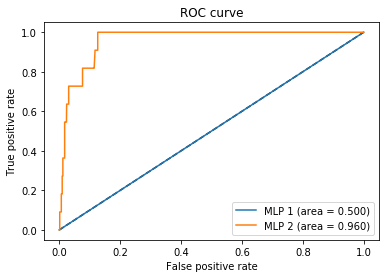

In [53]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_model1, tpr_model1, label='MLP 1 (area = {:.3f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='MLP 2 (area = {:.3f})'.format(auc_model2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

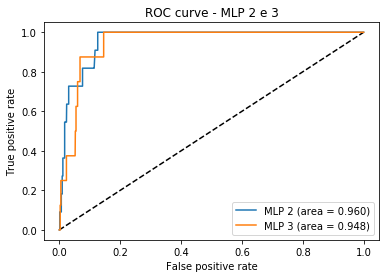

In [54]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_model2, tpr_model2, label='MLP 2 (area = {:.3f})'.format(auc_model2))
plt.plot(fpr_model3, tpr_model3, label='MLP 3 (area = {:.3f})'.format(auc_model3))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - MLP 2 e 3')
plt.legend(loc='best')
plt.show()